# Tutoriel : Convolutional neural network (CNN) 


This tutoriel is based on this one : https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import colors
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, AvgPool2D, Flatten, Dense, Dropout, UpSampling2D, Reshape
from tensorflow.keras.models import Sequential, Model

tf.__version__

2022-05-27 16:21:19.843355: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-27 16:21:19.843392: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.9.1'

## I. Presenting the API

In [3]:
test_in_img1 = []

for i in range(6): # rows
    row = []
    test_in_img1.append(row)
    for j in range(5): # columns
        nb = i * 5 + j
        row.append([nb, nb + 100])

test_in = np.array([test_in_img1])

print(test_in.shape)

test_in

(1, 6, 5, 2)


array([[[[  0, 100],
         [  1, 101],
         [  2, 102],
         [  3, 103],
         [  4, 104]],

        [[  5, 105],
         [  6, 106],
         [  7, 107],
         [  8, 108],
         [  9, 109]],

        [[ 10, 110],
         [ 11, 111],
         [ 12, 112],
         [ 13, 113],
         [ 14, 114]],

        [[ 15, 115],
         [ 16, 116],
         [ 17, 117],
         [ 18, 118],
         [ 19, 119]],

        [[ 20, 120],
         [ 21, 121],
         [ 22, 122],
         [ 23, 123],
         [ 24, 124]],

        [[ 25, 125],
         [ 26, 126],
         [ 27, 127],
         [ 28, 128],
         [ 29, 129]]]])

### I.1. Convolution

In [4]:
conv2d_model = Sequential([
    Conv2D(filters=4, kernel_size=(3, 3), strides=(1, 1), activation='relu', name='cnv') # padding="same"
], name='conv2d_exp')

# parameters numer is [3 (H) * 3 (W) * 2 (d) + 1 ] * 4 (k) = 76
conv2d_model.build(input_shape=(None, 6, 5, 2)) # images 6(H)X5(W)X2(d)

conv2d_model.summary()

2022-05-27 03:02:23.142117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-27 03:02:23.142159: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-27 03:02:23.142184: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kariminf-pc): /proc/driver/nvidia/version does not exist
2022-05-27 03:02:23.148080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "conv2d_exp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnv (Conv2D)                (None, 4, 3, 4)           76        
                                                                 
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [5]:
test_out = conv2d_model.predict(test_in)

print(test_out.shape)

# H' = (H - Hf + 2P)/S + 1 = (6 - 3 + (2 * 0))/1 + 1 = 4
# W' = (W - Wf + 2P)/S + 1 = (5 - 3 + (2 * 0))/1 + 1 = 3
# shape = (M, H', W', k) = (1, 4, 3, 4)
test_out

1/1 [==============================] - 1s 1s/step
(1, 4, 3, 4)


array([[[[ 0.      ,  0.      ,  0.      , 71.93787 ],
         [ 0.      ,  0.      ,  0.      , 71.95698 ],
         [ 0.      ,  0.      ,  0.      , 71.97608 ]],

        [[ 0.      ,  0.      ,  0.      , 72.03339 ],
         [ 0.      ,  0.      ,  0.      , 72.052475],
         [ 0.      ,  0.      ,  0.      , 72.07159 ]],

        [[ 0.      ,  0.      ,  0.      , 72.1289  ],
         [ 0.      ,  0.      ,  0.      , 72.148   ],
         [ 0.      ,  0.      ,  0.      , 72.1671  ]],

        [[ 0.      ,  0.      ,  0.      , 72.22441 ],
         [ 0.      ,  0.      ,  0.      , 72.243515],
         [ 0.      ,  0.      ,  0.      , 72.26262 ]]]], dtype=float32)

### I.2. Max Pool

In [6]:
maxpool2d_model = Sequential([
    MaxPool2D(pool_size=(3, 3), strides=(1, 1), name='mxp') # padding="same"
], name='maxpool2d_exp')

# parameters numer is zero
maxpool2d_model.build(input_shape=(None, 6, 5, 2)) # images 6(H)X5(W)X2(d)

maxpool2d_model.summary()

Model: "maxpool2d_exp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mxp (MaxPooling2D)          (None, 4, 3, 2)           0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [7]:
test_out = maxpool2d_model.predict(test_in)

print(test_out.shape)

# H' = (H - Hf + 2P)/S + 1 = (6 - 3 + (2 * 0))/1 + 1 = 4
# W' = (W - Wf + 2P)/S + 1 = (5 - 3 + (2 * 0))/1 + 1 = 3
# shape = (M, H', W', k) = (1, 4, 3, 4)
test_out

1/1 [==============================] - 0s 92ms/step
(1, 4, 3, 2)


array([[[[ 12., 112.],
         [ 13., 113.],
         [ 14., 114.]],

        [[ 17., 117.],
         [ 18., 118.],
         [ 19., 119.]],

        [[ 22., 122.],
         [ 23., 123.],
         [ 24., 124.]],

        [[ 27., 127.],
         [ 28., 128.],
         [ 29., 129.]]]], dtype=float32)

### I.3. Average Pool

In [8]:
avgpool2d_model = Sequential([
    AvgPool2D(pool_size=(3, 3), strides=(1, 1), name='avgp') # padding="same"
], name='avgpool2d_exp')

# parameters numer is zero
avgpool2d_model.build(input_shape=(None, 6, 5, 2)) # images 6(H)X5(W)X2(d)

avgpool2d_model.summary()

Model: "avgpool2d_exp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 avgp (AveragePooling2D)     (None, 4, 3, 2)           0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [9]:
test_out = avgpool2d_model.predict(test_in)

print(test_out.shape)

# H' = (H - Hf + 2P)/S + 1 = (6 - 3 + (2 * 0))/1 + 1 = 4
# W' = (W - Wf + 2P)/S + 1 = (5 - 3 + (2 * 0))/1 + 1 = 3
# shape = (M, H', W', k) = (1, 4, 3, 4)
test_out

1/1 [==============================] - 0s 94ms/step
(1, 4, 3, 2)


array([[[[  6., 106.],
         [  7., 107.],
         [  8., 108.]],

        [[ 11., 111.],
         [ 12., 112.],
         [ 13., 113.]],

        [[ 16., 116.],
         [ 17., 117.],
         [ 18., 118.]],

        [[ 21., 121.],
         [ 22., 122.],
         [ 23., 123.]]]], dtype=float32)

### I.4. Up Sampling

"interpolation" parameter: A string, one of "area", "bicubic", "bilinear", "gaussian", "lanczos3", "lanczos5", "mitchellcubic", "nearest".
Up to version 2.8, only "bilinear" and "nearest" are allowed.

In [15]:
upsamp2d_model = Sequential([
    UpSampling2D(size=(2, 2), interpolation='nearest', name='upsmp') # padding="same"
], name='upsamp2d_exp')

# parameters numer is zero
upsamp2d_model.build(input_shape=(None, 6, 5, 2)) # images 6(H)X5(W)X2(d)

upsamp2d_model.summary()

Model: "upsamp2d_exp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 upsmp (UpSampling2D)        (None, 12, 10, 2)         0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [16]:
test_out = upsamp2d_model.predict(test_in)

# W' = W * Wf = 5 * 2 = 10
# H' = H * Hf = 6 * 2 = 12
print(test_out.shape)

test_out

1/1 [==============================] - 0s 49ms/step
(1, 12, 10, 2)


array([[[[ -0.5897133 ,  99.41029   ],
         [ -0.35724473,  99.64275   ],
         [  0.13039824, 100.1304    ],
         [  0.9051269 , 100.90513   ],
         [  1.4044452 , 101.40444   ],
         [  1.6126996 , 101.6127    ],
         [  2.112018  , 102.11203   ],
         [  2.8867466 , 102.88675   ],
         [  3.37439   , 103.3744    ],
         [  3.6068585 , 103.606865  ]],

        [[  0.62693137, 100.62693   ],
         [  0.85939986, 100.85939   ],
         [  1.347043  , 101.34704   ],
         [  2.1217716 , 102.12178   ],
         [  2.6210897 , 102.62106   ],
         [  2.8293443 , 102.829346  ],
         [  3.3286629 , 103.32867   ],
         [  4.103391  , 104.103386  ],
         [  4.591034  , 104.59103   ],
         [  4.8235016 , 104.823494  ]],

        [[  3.194655  , 103.194664  ],
         [  3.4271226 , 103.427124  ],
         [  3.9147654 , 103.91477   ],
         [  4.6894946 , 104.68951   ],
         [  5.1888127 , 105.18882   ],
         [  5.3970675

## II. CNN classifier

### II.1. dataset

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train1 = x_train.reshape([-1, 784])
x_test1 = x_test.reshape([-1, 784])

y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

x_train.shape, x_test.shape, x_train1.shape, x_test1.shape

((60000, 28, 28), (10000, 28, 28), (60000, 784), (10000, 784))

### II.2. FFNN classifier

In [34]:
tf.random.set_seed(0)
ffnn_cls = Sequential(name='FFNN_classifier')
ffnn_cls.add(Dense(30, activation="relu", input_shape=(784,), name='FFNN_cls_h'))
ffnn_cls.add(Dropout(0.2))# this was added to reduce overtraining 
ffnn_cls.add(Dense(10, activation="softmax", name='FFNN_cls_out'))

ffnn_cls.summary()

Model: "FFNN_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FFNN_cls_h (Dense)          (None, 30)                23550     
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 FFNN_cls_out (Dense)        (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [35]:
ffnn_cls.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

print("Training FFNN classifier ...")
results = ffnn_cls.fit(x_train1, y_train_onehot, epochs=50, validation_data=(x_test1, y_test_onehot))


Training FFNN classifier ...
Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4987 - accuracy: 0.8515 - val_loss: 0.2389 - val_accuracy: 0.9316
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3015 - accuracy: 0.9104 - val_loss: 0.1923 - val_accuracy: 0.9436
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9231 - val_loss: 0.1674 - val_accuracy: 0.9519
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2338 - accuracy: 0.9292 - val_loss: 0.1553 - val_accuracy: 0.9531
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2192 - accuracy: 0.9321 - val_loss: 0.1515 - val_accuracy: 0.9548
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2072 - accuracy: 0.9358 - val_loss: 0.1474 - val_accuracy: 0.9552
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1999 - accuracy: 0.9380 - val

### II.3. CNN classifier

In [44]:
cnn_cls = Sequential(name='CNN_classifier')
cnn_cls.add(Conv2D(5, (4, 4), activation='relu', input_shape=(28, 28, 1), name='CNN_cls_conv1'))
cnn_cls.add(AvgPool2D((5, 5), name='CNN_cls_avgpool1'))
cnn_cls.add(Conv2D(2, (2, 2), activation='relu', name='CNN_cls_conv2'))
cnn_cls.add(Flatten())
cnn_cls.add(Dense(10, activation="softmax", name='CNN_cls_out'))


cnn_cls.summary()

Model: "CNN_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CNN_cls_conv1 (Conv2D)      (None, 25, 25, 5)         85        
                                                                 
 CNN_cls_avgpool1 (AveragePo  (None, 5, 5, 5)          0         
 oling2D)                                                        
                                                                 
 CNN_cls_conv2 (Conv2D)      (None, 4, 4, 2)           42        
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 CNN_cls_out (Dense)         (None, 10)                330       
                                                                 
Total params: 457
Trainable params: 457
Non-trainable params: 0
______________________________________________________

In [45]:
cnn_cls.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

print("Training CNN classifier ...")
results2 = cnn_cls.fit(x_train, y_train_onehot, epochs=50, validation_data=(x_test, y_test_onehot))


Training CNN classifier ...
Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7980 - accuracy: 0.7503 - val_loss: 0.4622 - val_accuracy: 0.8620
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4431 - accuracy: 0.8678 - val_loss: 0.3676 - val_accuracy: 0.8961
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3531 - accuracy: 0.8955 - val_loss: 0.2875 - val_accuracy: 0.9163
Epoch 4/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2891 - accuracy: 0.9138 - val_loss: 0.2417 - val_accuracy: 0.9304
Epoch 5/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2495 - accuracy: 0.9250 - val_loss: 0.2182 - val_accuracy: 0.9340
Epoch 6/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2251 - accuracy: 0.9326 - val_loss: 0.1941 - val_accuracy: 0.9420
Epoch 7/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2079 - accuracy: 0.937

### II.4. FFNN vs. CNN classifier

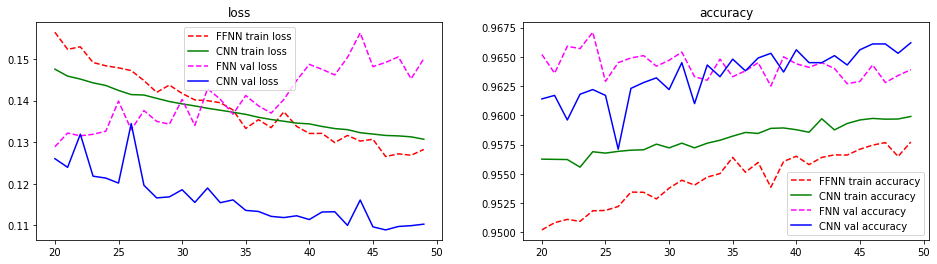

In [59]:
epochs = range(50)
start = 20
ffnn_hist = results.history
cnn_hist = results2.history

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

ax[0].plot(epochs[start:], ffnn_hist["loss"][start:], color="red", linestyle="--", label="FFNN train loss")
ax[0].plot(epochs[start:], cnn_hist["loss"][start:], color="green", label="CNN train loss")
ax[0].plot(epochs[start:], ffnn_hist["val_loss"][start:], color="magenta", linestyle="--", label="FNN val loss")
ax[0].plot(epochs[start:], cnn_hist["val_loss"][start:], color="blue", label="CNN val loss")
ax[0].set_title("loss")
ax[0].legend()

ax[1].plot(epochs[start:], ffnn_hist["accuracy"][start:], color="red", linestyle="--", label="FFNN train accuracy")
ax[1].plot(epochs[start:], cnn_hist["accuracy"][start:], color="green", label="CNN train accuracy")
ax[1].plot(epochs[start:], ffnn_hist["val_accuracy"][start:], color="magenta", linestyle="--", label="FNN val accuracy")
ax[1].plot(epochs[start:], cnn_hist["val_accuracy"][start:], color="blue", label="CNN val accuracy")
ax[1].set_title("accuracy")
ax[1].legend()

plt.show()

## III. CNN auto-encoder

In [67]:
# Encoder 
# ========

# the input of the encoder has a shape of (H X W X c) elements
inputs_cnnae = Input(shape=(28, 28, 1), name='CNN_encoder_in')
# Apply a conv2d with paddings to preserve the same image dimension with 3 channels
h = Conv2D(3, (2, 2), activation='relu', padding='same', name='CNN_encoder_h1')(inputs_cnnae)
# Apply a max pooling of 4X4 with a sliding window of 4 ; the shape will be (7 X 7 X 3)
h = MaxPool2D((4, 4), name='CNN_encoder_h2')(h)
# Apply a conv2d with paddings to generate a shape (5 X 5 X 1)
h = Conv2D(1, (3, 3), activation='relu', name='CNN_encoder_h3')(h)
# We flatten the matrix into a 25 vector
h = Flatten(name='CNN_encoder_h4')(h)
code_cnnae = Dense(2, activation="linear", name='CNN_encoder_out')(h)

encoder_cnnae = Model(inputs_cnnae, code_cnnae, name='CNN_encoder')

encoder_cnnae.summary()

Model: "CNN_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CNN_encoder_in (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 CNN_encoder_h1 (Conv2D)     (None, 28, 28, 3)         15        
                                                                 
 CNN_encoder_h2 (MaxPooling2  (None, 7, 7, 3)          0         
 D)                                                              
                                                                 
 CNN_encoder_h3 (Conv2D)     (None, 5, 5, 1)           28        
                                                                 
 CNN_encoder_h4 (Flatten)    (None, 25)                0         
                                                                 
 CNN_encoder_out (Dense)     (None, 2)                 52        
                                                       

In [68]:
# Decoder 
# ========

# the input of the decoder has a shape of 2 elements
latent_inputs_cnnae = Input(shape=(2,), name='CNN_decoder_in')
# a hidden layer of 25 elements
h = Dense(25, activation='relu', name='CNN_decoder_h1')(latent_inputs_cnnae)
# reshape the vector into a tensor of (5, 5, 1)
h = Reshape((5, 5, 1), name='CNN_decoder_h2')(h)
# Upsampling into a tensor of (10, 10, 1)
h = UpSampling2D(size=(2, 2), interpolation='nearest', name='CNN_decoder_h3')(h)
# apply a conv2d to have a tensor of (7, 7, 3)
h = Conv2D(3, (4, 4), activation='relu', name='CNN_decoder_h4')(h)
# Upsampling into a tensor of (28, 28, 3)
h = UpSampling2D(size=(4, 4), interpolation='nearest', name='CNN_decoder_h5')(h)
# apply a conv2d to have a tensor of (28, 28, 1)
outputs_cnnae = Conv2D(1, (2, 2), activation='sigmoid', padding='same', name='CNN_decoder_out')(h)

decoder_cnnae = Model(latent_inputs_cnnae, outputs_cnnae, name='CNN_decoder')

decoder_cnnae.summary()

Model: "CNN_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CNN_decoder_in (InputLayer)  [(None, 2)]              0         
                                                                 
 CNN_decoder_h1 (Dense)      (None, 25)                75        
                                                                 
 CNN_decoder_h2 (Reshape)    (None, 5, 5, 1)           0         
                                                                 
 CNN_decoder_h3 (UpSampling2  (None, 10, 10, 1)        0         
 D)                                                              
                                                                 
 CNN_decoder_h4 (Conv2D)     (None, 7, 7, 3)           51        
                                                                 
 CNN_decoder_h5 (UpSampling2  (None, 28, 28, 3)        0         
 D)                                                    

In [69]:
outputs_cnnae = decoder_cnnae(encoder_cnnae(inputs_cnnae))
cnnae = Model(inputs_cnnae, outputs_cnnae, name='CNNAE_atoencoder')

cnnae.summary()

Model: "CNNAE_atoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CNN_encoder_in (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 CNN_encoder (Functional)    (None, 2)                 95        
                                                                 
 CNN_decoder (Functional)    (None, 28, 28, 1)         139       
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [70]:
# we can train it on a problem of regression
cnnae.compile(optimizer='adam', loss='mean_squared_error')


cnnae.fit(x_train, x_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0803
Epoch 2/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0620
Epoch 3/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0612
Epoch 4/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0608
Epoch 5/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0606
Epoch 6/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0605
Epoch 7/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0603
Epoch 8/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0602
Epoch 9/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0601
Epoch 10/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0601
Epoch 11/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0600
Epoch 12/50
1875/1875 [==============================] - 25s 13

In [71]:
# encode the samples into two dimension representation
encoded_imgs = encoder_cnnae.predict(x_train)

print(encoded_imgs.shape)

1875/1875 [==============================] - 7s 4ms/step
(60000, 2)


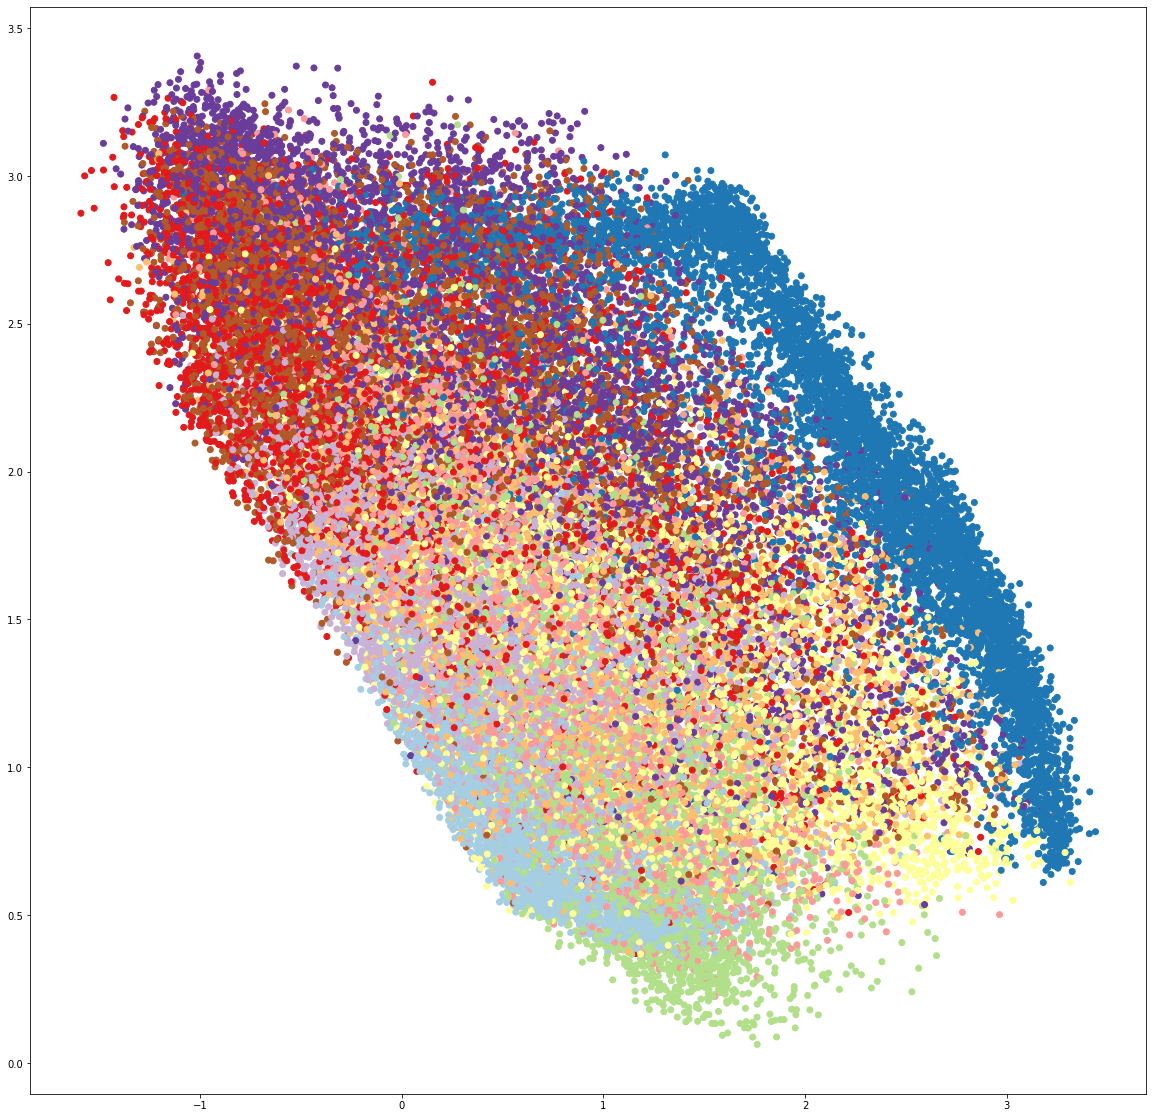

In [72]:
# plot the distribution of samples using the codes learned using the auto-encoder
# Each color represents a number
plt.figure(figsize=(20, 20))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_train, cmap = plt.cm.Paired)

In [73]:
# a function that plots some reconstructed numbers based on 
# an interval of values on x and y
# model: this is the encoder model
# nx: this is the number of values we chose over x
# ny: this is the number of values we chose over y
# interval: a tuple (min_x, min_y, max_x,max_y)
def draw_generated_images(model, nx, ny, interval):
    min_x, min_y, max_x, max_y = interval
    # generate a vector x of nx elements which the values are between min_x and max_x
    grid_x = np.linspace(min_x, max_x, nx) 
    # generate a vector y of ny elements which the values are between min_y and max_y
    grid_y = np.linspace(min_y, max_y, ny)
    
    # generate some codes by combining all values of x and y
    codes = np.array(np.meshgrid(grid_x, grid_y)).T.reshape(-1, 2)
    # predict the image based on the codes 
    decoded_imgs = model.predict(codes)

    plt.figure(figsize=(20, 4))
    for xi in range(nx):
        for yi in range(ny): 
            i = yi * nx + xi
            #print(i)
            ax = plt.subplot(ny, nx, i + 1)
            plt.imshow(decoded_imgs[i].reshape(28, 28))
            plt.gray()
            #plt.title(str(codes[i]))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()
    
print('function defined')

function defined


1/1 [==============================] - 0s 183ms/step


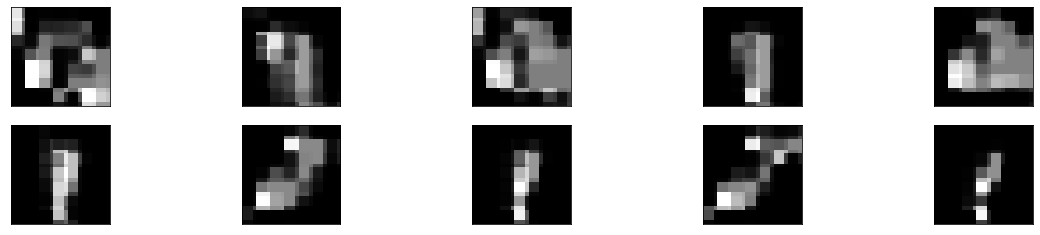

In [76]:
# plot the generated images
draw_generated_images(decoder_cnnae, 5, 2, (encoded_imgs[:, 0].min(), encoded_imgs[:, 1].min(), encoded_imgs[:, 0].max(), encoded_imgs[:, 1].max()))

## IV. CNN denoising auto-encoder

this is taken from : https://blog.keras.io/building-autoencoders-in-keras.html

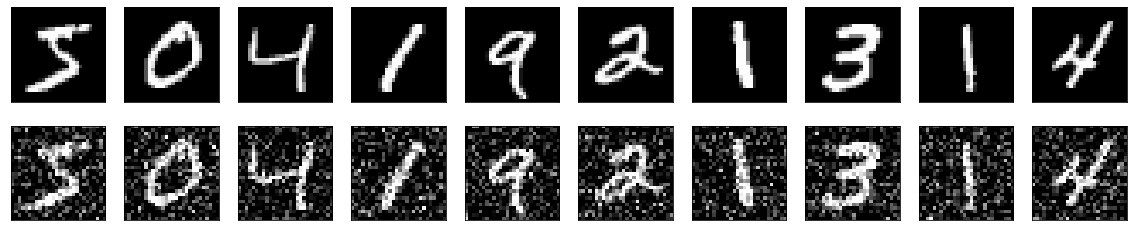

In [4]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [80]:
# This architecture is too heavy
# input_img = Input(shape=(28, 28, 1))

# x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPool2D((2, 2), padding='same')(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPool2D((2, 2), padding='same')(x)

# # At this point the representation is (7, 7, 32)

# x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# denoising_ae = keras.Model(input_img, decoded)

# denoising_ae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          9248  

In [5]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(10, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(10, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

denoising_ae = keras.Model(input_img, decoded)

denoising_ae.summary()

2022-05-27 16:22:58.223889: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-27 16:22:58.223933: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-27 16:22:58.223965: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kariminf-pc): /proc/driver/nvidia/version does not exist
2022-05-27 16:22:58.236473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 2)         182       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 2)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 2)           38    

In [8]:
# we can train it on a problem of regression
denoising_ae.compile(optimizer='adam', loss='mean_squared_error')

denoising_ae.fit(x_train, x_train, epochs=10) 

2022-05-27 16:27:15.851261: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0095
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0092
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0091
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0089
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0088
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0088
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0087
Epoch 8/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0087
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0086
Epoch 10/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0086


1/1 [==============================] - 0s 224ms/step


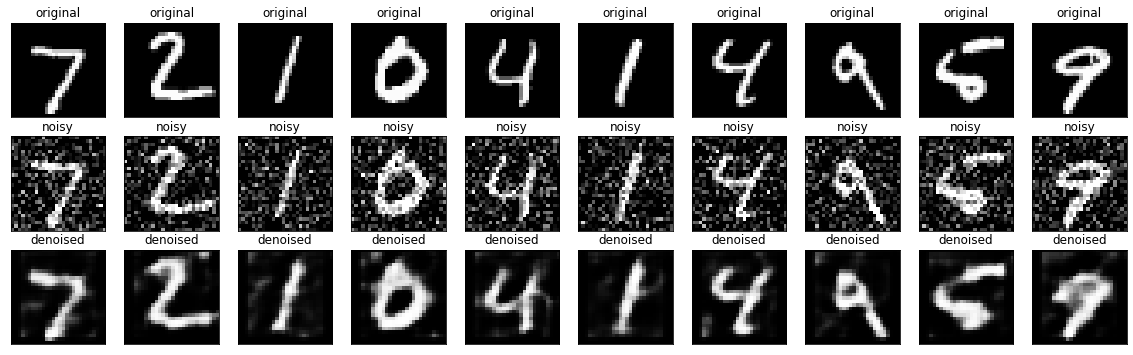

In [9]:
n = 10  # how many digits we will display
x_denoised = denoising_ae.predict(x_test_noisy[:n, :])
plt.figure(figsize=(20, 8))
for i in range(n):
    # original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("original")
    
    # noisy
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("noisy")

    # denoised
    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(x_denoised[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("denoised")
    
plt.show()